In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from  keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import make_classification


In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

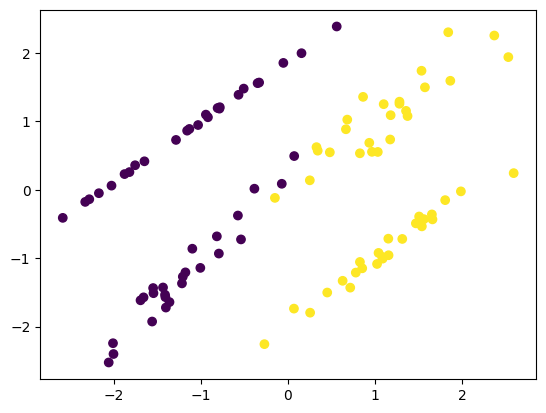

In [3]:
plt.scatter(X[:,0], X[:,1], c= y)

In [4]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim = 2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.get_weights()

[array([[0.9715961 , 0.7622168 ],
        [0.34230077, 0.5602522 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.68236995],
        [ 0.14848602]], dtype=float32),
 array([0.], dtype=float32)]

In [6]:
initial_ws = model.get_weights()

In [7]:
initial_ws[0] = np.zeros(model.get_weights()[0].shape)
initial_ws[1] = np.zeros(model.get_weights()[1].shape)
initial_ws[2]= np.zeros(model.get_weights()[2].shape)
initial_ws[3] = np.zeros(model.get_weights()[3].shape)

In [8]:
model.set_weights(initial_ws)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= ['accuracy'])
model.fit(X,y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 121ms/step - loss: 0.6932 - accuracy: 0.4375 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

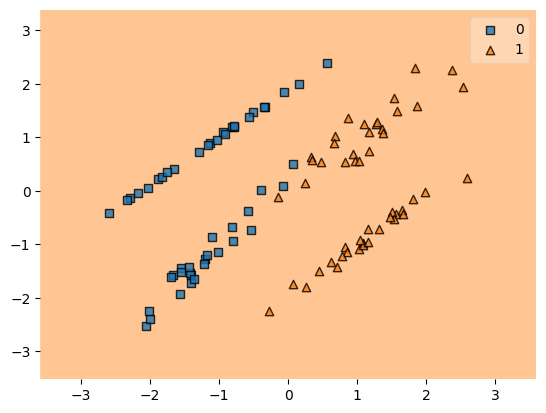

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model)

#### Now if we set all the weights to 0.5 a constant value 

In [11]:
initial_ws[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_ws[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_ws[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_ws[3] = np.ones(model.get_weights()[3].shape)*0.5

In [12]:
model.set_weights(initial_ws)

In [13]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [14]:
model.fit(X,y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.5000
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.5000
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.5000
Epoch 11/100
4/4 [===========

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

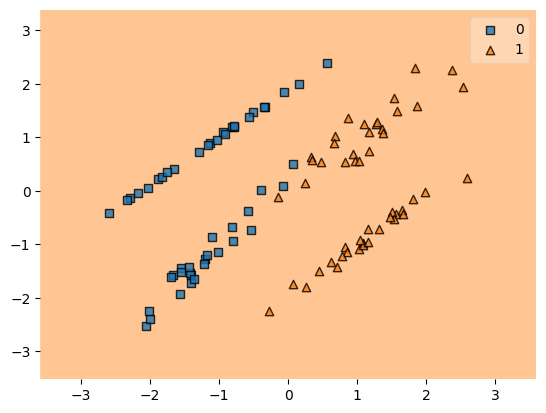

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model)

#### By examining the output we can say that a constant initialializaton of weights are also not usable 

In [29]:
model1 = Sequential()

model1.add(Dense(10,activation='tanh',input_dim=2))
model1.add(Dense(10,activation='tanh'))
model1.add(Dense(10,activation='tanh'))
model1.add(Dense(10,activation='tanh'))
model1.add(Dense(1,activation='sigmoid'))

In [30]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### NOw here we are using the xavier weight initialization technique foe weights

In [31]:
initial_weights = model1.get_weights()

In [32]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model1.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model1.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model1.get_weights()[9].shape)

In [33]:
model1.set_weights(initial_weights)

In [34]:
model1.get_weights()

[array([[ 0.3276038 , -0.5823196 , -0.5339867 ,  0.717505  ,  0.39302763,
         -0.33406848, -1.7973176 ,  0.9233024 , -0.5018868 , -0.58364934],
        [ 0.39432505, -0.8070722 ,  1.0570071 , -0.2479179 ,  0.9450468 ,
          1.5358644 ,  1.585187  ,  1.4048347 ,  0.05425136,  1.3862976 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3594696 , -0.12173288,  0.06232914,  0.4727782 , -0.45764306,
          0.27155048, -0.04151573,  0.09322076,  0.00903848, -0.34037983],
        [ 0.26762185, -0.05843415, -0.2117952 ,  0.03222357,  0.25065222,
         -0.08811858, -0.17143017, -0.09422582, -0.18155088,  0.08561254],
        [-0.23614264, -0.24351826, -0.0220643 , -0.24165094, -0.20811366,
         -0.01609394,  0.3887744 , -0.06850532, -0.13484791,  0.01563085],
        [ 0.1431967 , -0.27785248, -0.3228564 , -0.2654123 , -0.19083765,
         -0.09599923,  0.45064542, -0.10596877, -0.21005319, -0.35946408],
        [ 0.42099

In [35]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

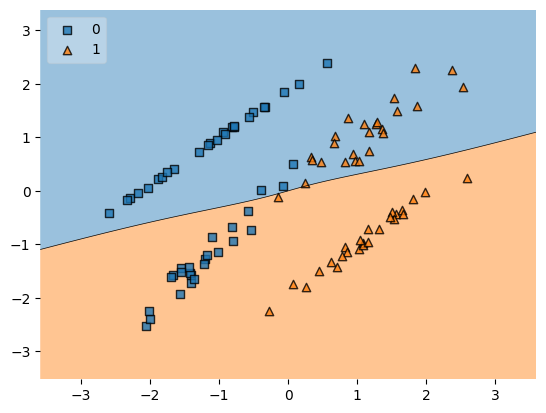

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

### In the output we see the differecne 

### Now if we use he_normal initialization

In [42]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                30        
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
history = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 283ms/step - loss: 0.6601 - accuracy: 0.3750 - val_loss: 0.6426 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6431 - accuracy: 0.4125 - val_loss: 0.6231 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6261 - accuracy: 0.4500 - val_loss: 0.6051 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6106 - accuracy: 0.4875 - val_loss: 0.5870 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5945 - accuracy: 0.5125 - val_loss: 0.5701 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.5791 - accuracy: 0.5625 - val_loss: 0.5537 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 112ms/step - loss: 0.5633 - accuracy: 0.6750 - val_loss: 0.5373 - val_accuracy: 0.7500
Epoch 8/100
3/3 [=

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

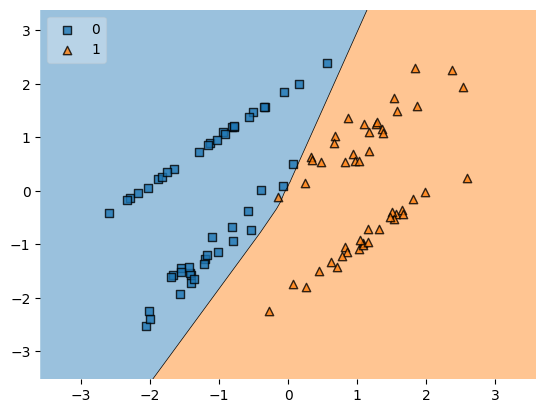

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

### So we see the effect of correct inititalization techniques in Modeling the architecture of Neural Network